tf.optimizers.

1) SGD  # Классический оптимизатор, который обновляет веса в направлении антиградиента функции потерь
2) Adam  # Оптимизатор, сочетающий в себе преимущества адаптивного градиентного спуска (Adagrad) и Root Mean Square Propagation (RMSprop).
3) RMSprop  # Оптимизатор адаптирует скорость обучения для каждого параметра на основе истории градиентов для этого параметра.
4) Adagrad  # Оптимизатор уменьшает скорость обучения для параметров, которые редко или никогда не обновлялись, и увеличивает скорость обучения для параметров, которые часто обновлялись
5) Adadelta  # Оптимизатор является расширением Adagrad и использует только последние градиенты для обновления параметров.
6) Adamax  # Оптимизатор является вариантом Adam, который использует бесконечную норму вместо L2 нормы для обновления параметров.
6) Nadam  # Оптимизатор является комбинацией методов Nesterov Accelerated Gradient (NAG) и Adam

`seaborn` - библиотека типо matplotlib для построения графиков

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import  keras
from keras.optimizers import SGD, Adam
from keras.layers import Normalization
from keras import layers
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

## Импорт базы данных

In [2]:
df = pd.read_csv('C:\ML\DataBases/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Разделение данных на тренировочные и тестовые

In [5]:
train = df.sample(frac=0.8, random_state=42)
test = df.drop(train.index)

In [6]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
16,8.5,0.28,0.56,1.80,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7
1072,7.2,0.35,0.26,1.80,0.083,33.0,75.0,0.99680,3.40,0.58,9.5,6
1574,5.6,0.31,0.78,13.90,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6
546,7.5,0.55,0.24,2.00,0.078,10.0,28.0,0.99830,3.45,0.78,9.5,6


In [7]:
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
13,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5
14,8.9,0.62,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
20,8.9,0.22,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1569,6.2,0.51,0.14,1.9,0.056,15.0,34.0,0.99396,3.48,0.57,11.5,6
1570,6.4,0.36,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.4,6
1573,6.0,0.58,0.20,2.4,0.075,15.0,50.0,0.99467,3.58,0.67,12.5,6
1583,6.2,0.46,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5


In [8]:
def snsPairGrid(df):

    sns.set(style='whitegrid')
    g = sns.PairGrid(df,diag_sharey=False,height=4)
    g.fig.set_size_inches(15,15)
    g.map_diag(sns.kdeplot, lw=2)
    g.map_lower(sns.scatterplot,s=25,edgecolor="k",linewidth=0.5,alpha=0.4)
    g.map_lower(sns.kdeplot,cmap='plasma',n_levels=6,alpha=0.5)
    plt.tight_layout()

KeyboardInterrupt: 

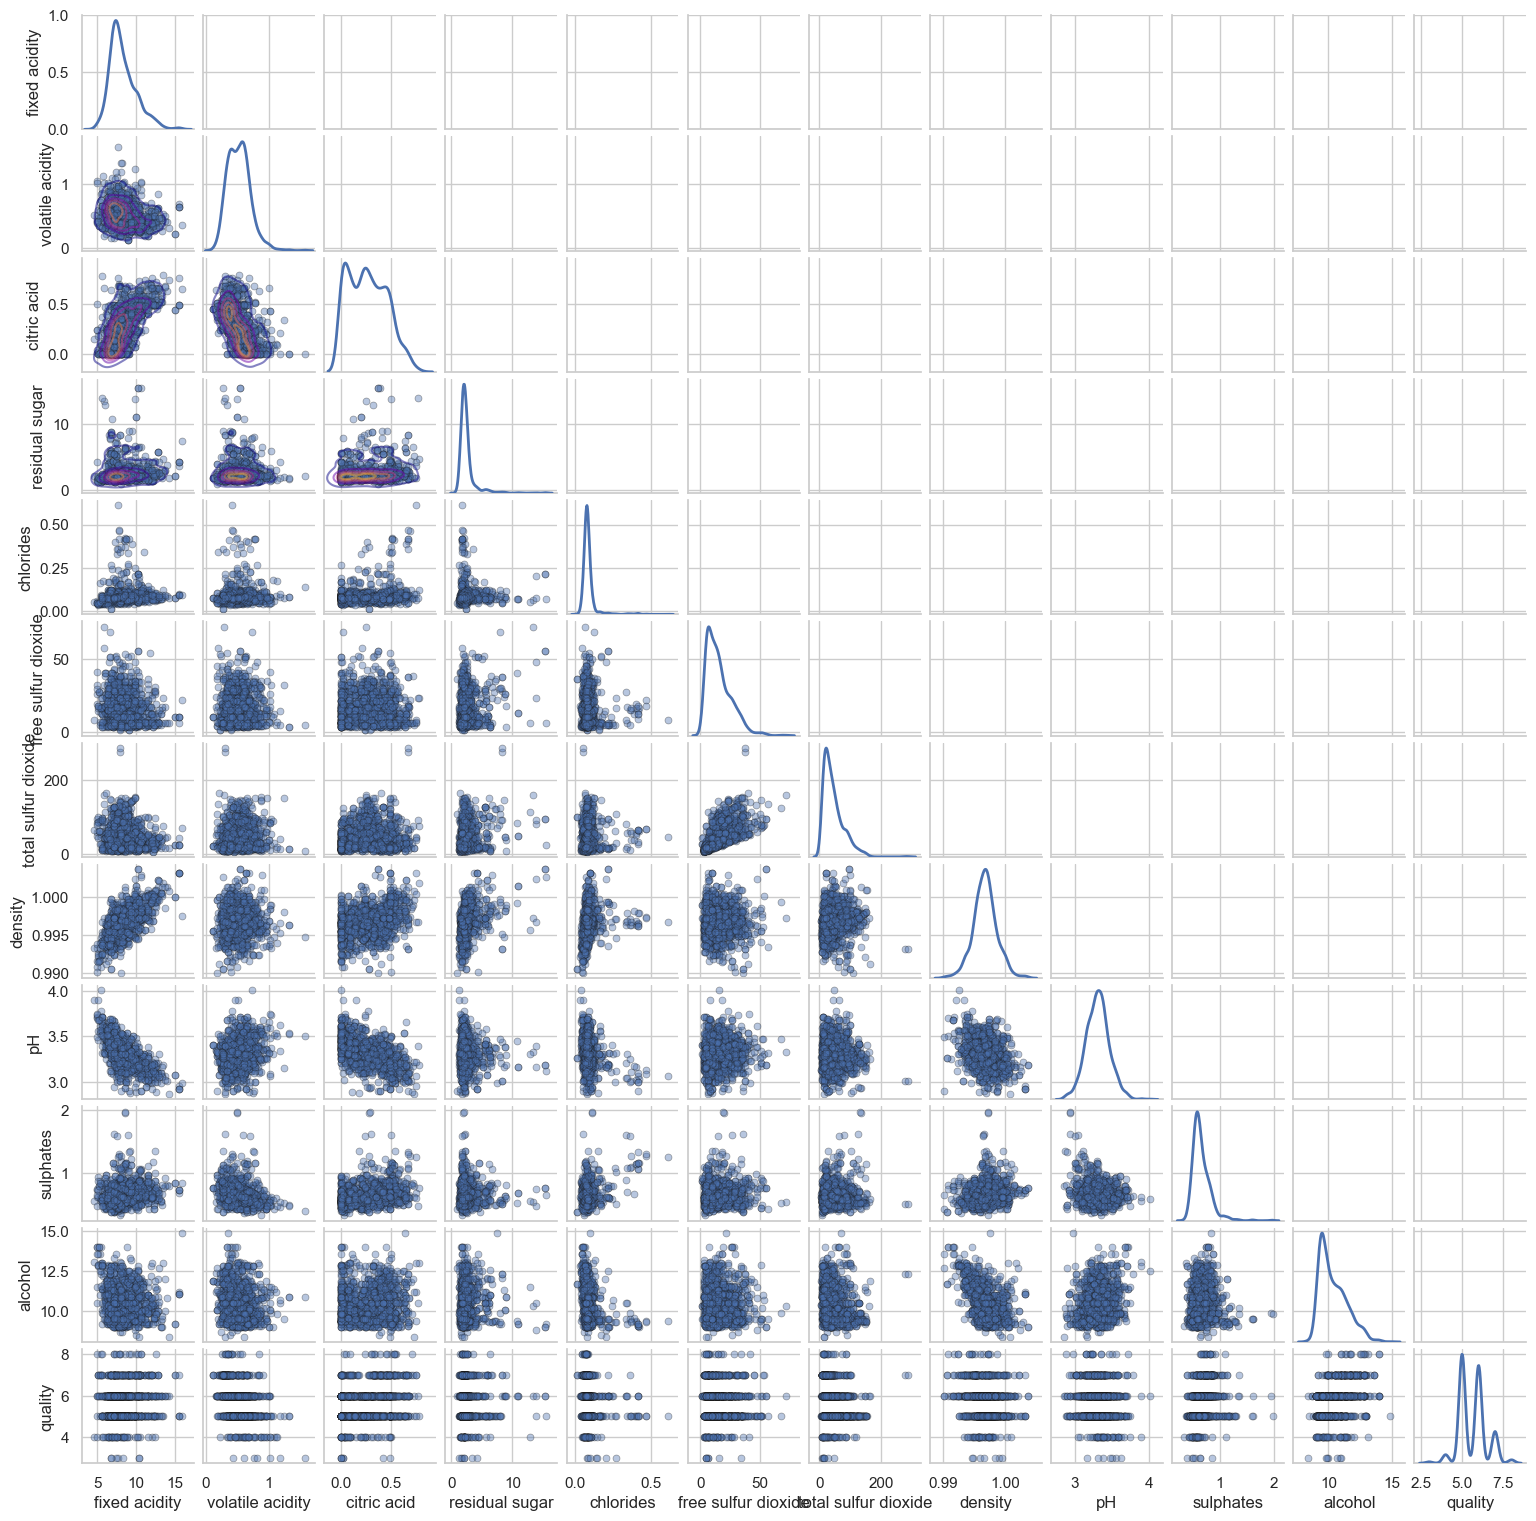

In [9]:
snsPairGrid(train)

In [ ]:
x_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
x_test,  y_test = test.iloc[:, :-1], test.iloc[:, -1]

## Матрица корреляции признаков.

<Axes: >

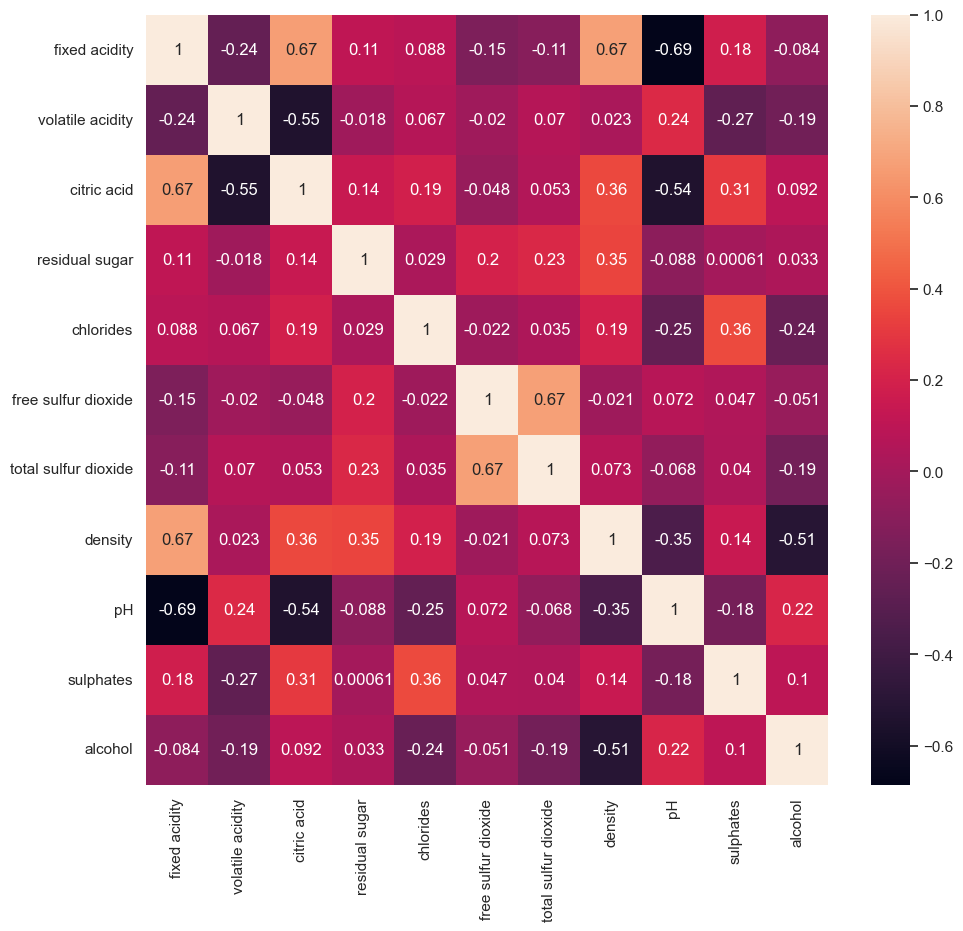

In [ ]:
fig, ax = plt.subplots(figsize=(11, 10))
sns.heatmap(x_train.corr(), annot = True)

## Задаем нормализатор

In [ ]:
normalizer = Normalization(input_dim=len(x_train.columns), axis=1)
# input_dim - количество  столбцов в массиве, axis=1 указывает, как будут нормализовываться данные
# (1 - по столбцам, None - по строкам)

normalizer.adapt(np.array(x_train))  # adapt показывает нормализотору пример данных, 
                                    # с которых он считывает метрики для скейла последующих данных

## Компиляция модели

In [ ]:
model = Sequential([
    normalizer,
    layers.Flatten(),
    layers.Dense(16,  activation='relu'),
    layers.Dense(32,  activation='relu'),
    layers.Dense(64,  activation='relu'),
    layers.Dense(128,  activation='relu'),
    layers.Dense(1)
])

In [ ]:
model.compile(
    optimizer=SGD(learning_rate=0.01),  # шаг при процессе схождения весов (лучше брать от  0.001 до 0.1)
    loss='mse',
    metrics=['mae', 'mse']
)

In [ ]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, verbose=0)]

# keras.callbacks.ModelCheckpoint(filepath='model_{epoch:02d}.h5', save_best_only=True, monitor='val_loss', verbose=0) - сохранение модели во время обучения

## Обучение модели

In [ ]:
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    batch_size=32,
    epochs=100,
    callbacks=callbacks,
    verbose=True # отображэть процесс обучения модели
)

Epoch 1/100
40/40 [==============================] - 1s 5ms/step - loss: 4.9007 - mae: 1.5425 - mse: 4.9007 - val_loss: 0.8448 - val_mae: 0.7052 - val_mse: 0.8448
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7411 - mae: 0.6711 - mse: 0.7411 - val_loss: 0.6285 - val_mae: 0.6136 - val_mse: 0.6285
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5971 - mae: 0.6061 - mse: 0.5971 - val_loss: 0.5380 - val_mae: 0.5709 - val_mse: 0.5380
Epoch 4/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5332 - mae: 0.5735 - mse: 0.5332 - val_loss: 0.4622 - val_mae: 0.5191 - val_mse: 0.4622
Epoch 5/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4908 - mae: 0.5505 - mse: 0.4908 - val_loss: 0.4686 - val_mae: 0.5439 - val_mse: 0.4686
Epoch 6/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4678 - mae: 0.5387 - mse: 0.4678 - val_loss: 0.4330 - val_mae: 0.4890 - val_mse: 0.4330
Epoch 7/100
40/40 [===

In [ ]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5
13,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1
14,8.9,0.62,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2
20,8.9,0.22,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1569,6.2,0.51,0.14,1.9,0.056,15.0,34.0,0.99396,3.48,0.57,11.5
1570,6.4,0.36,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.4
1573,6.0,0.58,0.20,2.4,0.075,15.0,50.0,0.99467,3.58,0.67,12.5
1583,6.2,0.46,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8


## Проверка качества обучения модели

In [ ]:
y_pred = model.predict(x_test)
y_pred = y_pred.reshape(-1,)

print(f'percentage correct: {np.sum(y_pred.round(0)==y_test.values)/len(y_test)*100}')

10/10 [==============================] - 0s 570us/step
percentage correct: 65.625


In [ ]:
df = pd.DataFrame(y_pred, columns=['y_pred'])
df['y_test'] = y_test.values
df['is_true'] = df['y_pred'].round(0) == df['y_test']
df

,y_pred,y_test,is_true
0,4.974074,5,True
1,5.741925,7,False
2,5.508290,5,False
3,4.729596,5,True
4,5.471131,6,False
...,...,...,...
315,5.621683,6,True
316,6.682770,6,False
317,6.131669,6,True
318,5.513639,5,False


## Графики, описывающие качество обучения модели

In [ ]:
def plot_graphs(y_pred, y_test, figsize=(12, 12), fontsize=15):
    # рисую гистограмму

    plt.figure(figsize=figsize)

    plt.subplot(1, 2, 1)
    plt.hist((y_pred-y_test)*100/len(y_test))
    plt.title('MAE', fontsize=fontsize)

    # рисую график отклонения предиктов от идеала
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test)-1, max(y_test)+1], [min(y_test)-1, max(y_test)+1], c='red')
    plt.title('Deviation from the ideal', fontsize=fontsize)

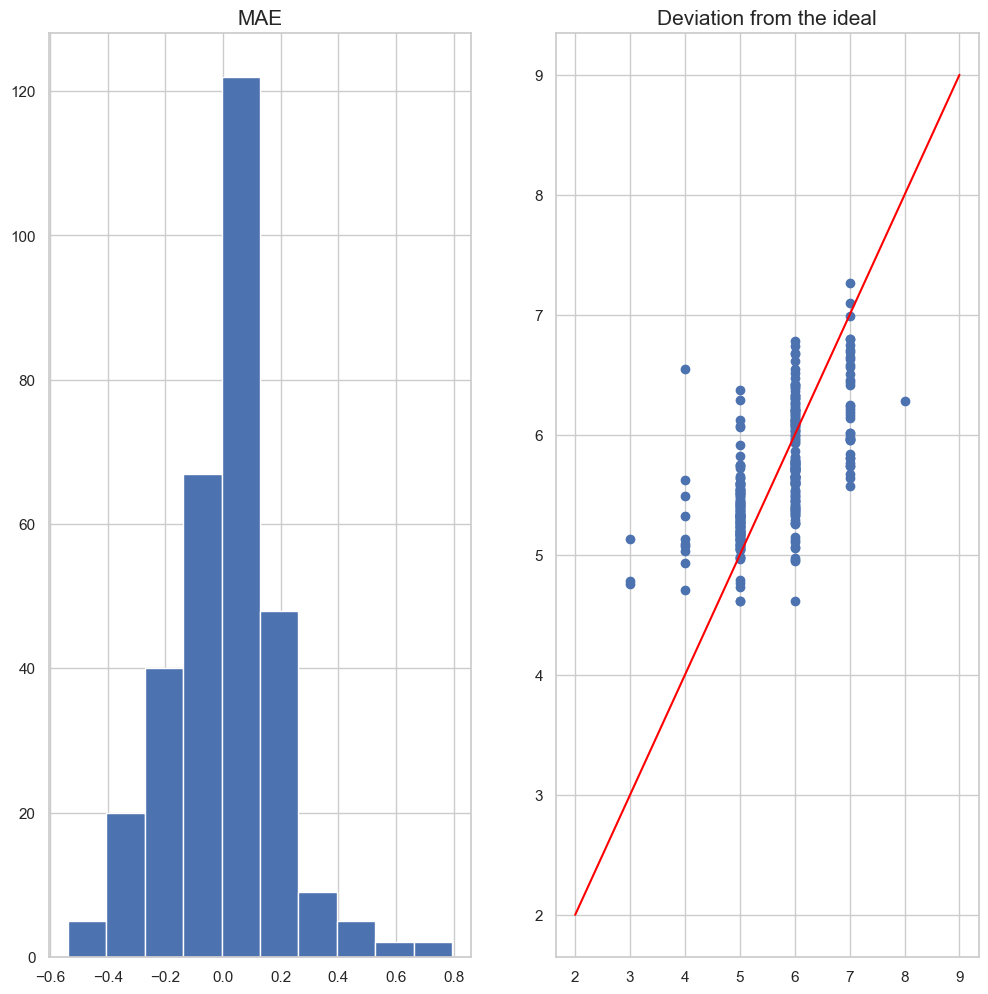

In [ ]:
plot_graphs(y_pred, y_test.values)